<a href="https://colab.research.google.com/github/EmanuelPatricio/RegresionLineal/blob/main/Copy_of_ids330_01_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Práctica 01] Regresión Lineal

La regresión lineal es un método utilizado en estadística para entender la relación entre dos variables. Imagina que tienes dos conjuntos de datos, uno se llama variable independiente (X) y otro se llama variable dependiente (Y). La regresión lineal busca encontrar una línea recta que mejor se ajuste a esos datos.

Esta línea recta se llama "línea de regresión" y se representa mediante una ecuación de la forma Y = aX + b. Aquí, "a" representa la pendiente de la línea, que indica cuánto cambia la variable dependiente (Y) cuando la variable independiente (X) aumenta en una unidad. "b" es el punto de intersección de la línea con el eje Y, y muestra el valor de Y cuando X es igual a cero.

El objetivo de la regresión lineal es encontrar los valores de "a" y "b" que minimicen la distancia entre los puntos de datos y la línea de regresión. Esto nos permite predecir los valores de Y para nuevos valores de X basándonos en la relación lineal encontrada.

En esta práctica vamos a utilizar el algoritmo de regresión lineal para encontrar la relación entre dos variables. Para ello tenemos que:

1. Seleccionar los datos.
2. Definir nuestro modelo.
3. Entrenar el modelo en base a los datos.
4. Validar nuestro modelo entrenado.

**La primera parte de esta práctica muestra un ejemplo de implementación, mientras que en la segunda parte tendrán que completar el código**

## Primera parte | Ejemplo con base de datos *millas por galón*

### 1.1 Seleccionar datos

Los datos de entrenamiento y los datos de prueba son conjuntos de datos utilizados para entrenar y evaluar modelos de IA.

Los datos de entrenamiento son un conjunto de ejemplos que se utilizan para enseñar al modelo cómo realizar una tarea específica. Estos datos contienen ejemplos de entrada (características o atributos) y su correspondiente salida esperada (etiquetas). El modelo utiliza estos datos de entrenamiento para aprender patrones y relaciones entre las características y las etiquetas, y así ajustar sus parámetros internos.

Una vez que el modelo ha sido entrenado con los datos de entrenamiento, se evalúa su desempeño utilizando los datos de prueba. Estos datos de prueba son un conjunto separado de ejemplos que no se han utilizado durante el entrenamiento. Se utilizan para medir la capacidad del modelo de generalizar lo que ha aprendido. El modelo hace predicciones sobre los ejemplos de prueba y se comparan con las etiquetas reales para evaluar qué tan bien está funcionando el modelo.

La separación de los datos en conjuntos de entrenamiento y prueba es importante para evitar un sesgo en la evaluación del modelo. Al utilizar datos de prueba que el modelo no ha visto previamente, se obtiene una estimación más realista de su rendimiento en situaciones nuevas y desconocidas.

In [ ]:
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = sn.load_dataset('mpg')
data = data.dropna()  # eliminar valores vacios
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


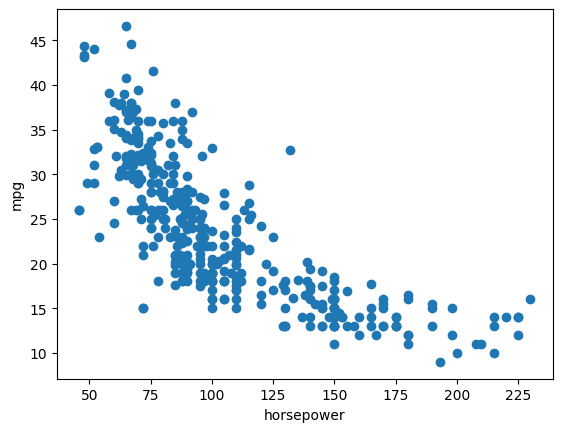

In [ ]:
# Objetivo
y = data['mpg'].values

# Atributo
x = data['horsepower'].values

plt.scatter(x, y)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

In [ ]:
# randomizar el order
data = data.sample(n=len(data))

# seleccionar el 80% training
n = len(data)
train_n = int(n * 0.8)
train_data = data[:train_n]

# seleccionar el 20% testing
test_data = data[train_n:]

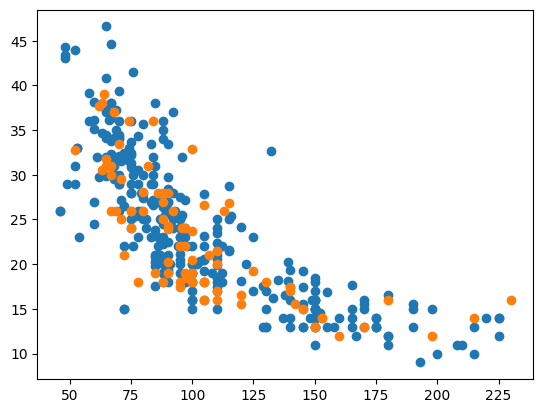

In [ ]:
x_train = train_data.horsepower.values
y_train = train_data.mpg.values

x_test = test_data.horsepower.values
y_test = test_data.mpg.values

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.show()

### Entrenar el modelo

La "línea de regresión" se representa mediante una ecuación de la forma $Y = θ_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$ o $Y = Θ \cdot X$.

En inteligencia artificial, una hipótesis es una suposición o conjetura sobre una relación entre variables o características que se utiliza para formular un modelo o algoritmo. En el contexto del aprendizaje automático, una hipótesis se refiere a una función o modelo matemático propuesto que intenta capturar la relación subyacente entre las variables de entrada y salida. 

Entonces, dada nuestra data, la hipótesis está definida por la siguiente ecuación:

$h = \theta_1 x + \theta_0$




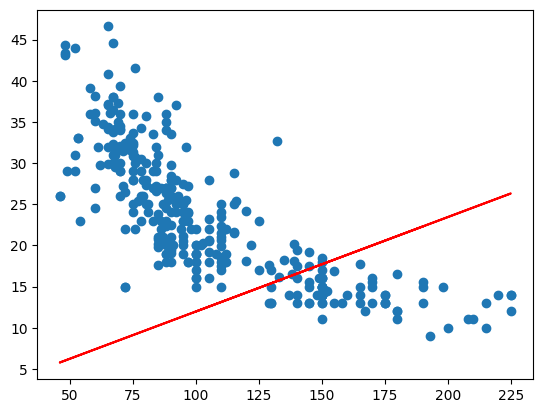

In [ ]:
theta_0 = np.random.random()
theta_1 = np.random.random()

h = theta_0 + theta_1 * x_train

plt.scatter(x_train, y_train)
plt.plot(x_train, h, 'r')
plt.show()

La **función de error**, también conocida como función de pérdida o función objetivo, es una medida que cuantifica la discrepancia entre las salidas predichas por un modelo y las salidas reales o esperadas. Esta función se utiliza durante el entrenamiento de un modelo de aprendizaje automático para evaluar qué tan bien está realizando sus predicciones y ajustar sus parámetros de manera que se minimice el error.

La elección de la función de error depende del tipo de problema y del objetivo del modelo. Por ejemplo, en un problema de regresión, donde se intenta predecir un valor numérico, una función de error común es el error cuadrático medio (MSE, por sus siglas en inglés), que calcula el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales.

Error cuadrático medio:

$L = \frac{1}{N}\sum_{i=0}^{N}{(y - h(x))^2}$

$L = \frac{1}{N}\sum_{i=0}^{N}{(y - \hat{y})^2}$

Sin utilizar numpy, se puede definir la función de error como:

```
def mse(y: list, pred: list):
    N = len(y)
    sum = 0
    for i in range(N):
        sum += (y[i] - pred[i])**2
    mean = sum/N
    return mean
```

In [ ]:
# Funcion de error
def mse(y: np.ndarray, pred: np.ndarray):
    return ((y - pred)**2).mean()

La gradiente es un vector de derivadas parciales que indica la dirección y magnitud del mayor crecimiento de una función en cada punto. En el aprendizaje automático, se utiliza en algoritmos de optimización, como el descenso de gradiente, para ajustar los parámetros del modelo de manera que se minimice una función del error. La gradiente proporciona la información necesaria para actualizar los parámetros en la dirección correcta para mejorar el rendimiento del modelo.

**Derivada de la función de error:**

$L = \frac{1}{N}\sum_{i=0}^{N}{(y_i - \theta_1 x_i - \theta_0)^2}$

$\frac{dL}{d \theta_0} = - \frac{2}{N}\sum_{i=0}^{N}{(y_i - \theta_1 x_i - \theta_0)} $

$\frac{dL}{d \theta_1} = - \frac{2}{N}\sum_{i=0}^{N}{x_i(y_i - \theta_1 x_i - \theta_0)} $

$\theta_{n} = \theta_{v} - α \frac{dL}{d\theta}$

In [ ]:
# PROCESO DE ENTRENAMIENTO

x_train = train_data.horsepower.values 

# En la practica, es recomendable normalizar los datos
x_train = x_train/x_train.max()
y_train = train_data.mpg.values

x_test = test_data.horsepower.values
y_test = test_data.mpg.values

alpha = 0.00001

theta_0 = np.random.random()
theta_1 = np.random.random()
for i in range(10000):

    # Calcular los valores de prediction y el error
    h = theta_0 + theta_1 * x_train
    error = mse(y=y_train, pred=h)
    #print(f"Error: {error}")

    # Calcular gradientes
    d_theta_0 = 2 * (h - y_train).sum()
    d_theta_1 = 2 * (h - y_train).dot(x_train)

    # Modificando parametros
    theta_0 = theta_0 - alpha*d_theta_0
    theta_1 = theta_1 - alpha*d_theta_1 

In [ ]:
print(f"El modelo es h = {theta_1:.2f}x + {theta_0:.2f}")

El modelo es h = -26.55x + 35.83


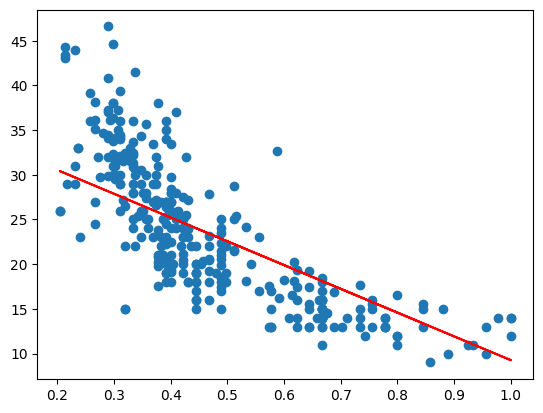

In [ ]:
h = theta_0 + theta_1 * x_train
plt.scatter(x_train, y_train)
plt.plot(x_train, h, 'r')
plt.show()

### Evaluando el modelo

Evaluar el modelo entrenado en un conjunto de pruebas es esencial para medir la capacidad de generalización, controlar el sobreajuste, comparar modelos y obtener retroalimentación para mejoras. Proporciona una evaluación objetiva y realista del rendimiento del modelo en datos no vistos previamente, lo cual es fundamental para su aplicación práctica y éxito en situaciones reales.

In [ ]:
x_test = x_test/x_test.max()
pred_test = theta_0 + theta_1 * x_test
mse(y=y_test, pred=pred_test)

24.281244511929692

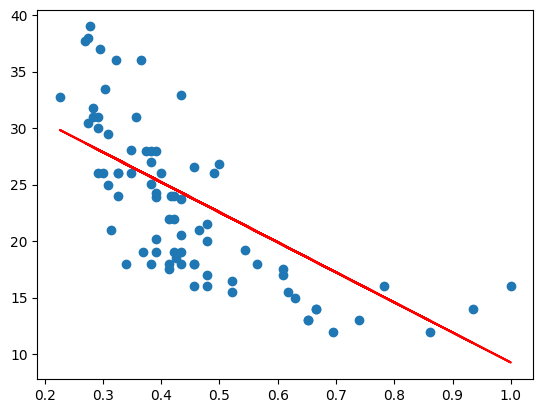

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, pred_test, 'r')
plt.show()

### Utilizando libraria **scikit-learn**
https://scikit-learn.org/

En práctica es mucho más fácil recurrir a librerias. Después de todo no vamos a reinventar la rueda.

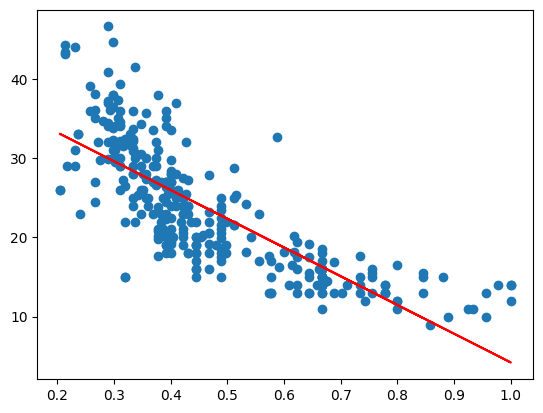

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Entrenar
model = model.fit(x_train.reshape(-1, 1), y_train)

# Predecir
pred = model.predict(x_train.reshape(-1,1))

plt.scatter(x_train, y_train)
plt.plot(x_train, pred, 'r')
plt.show()

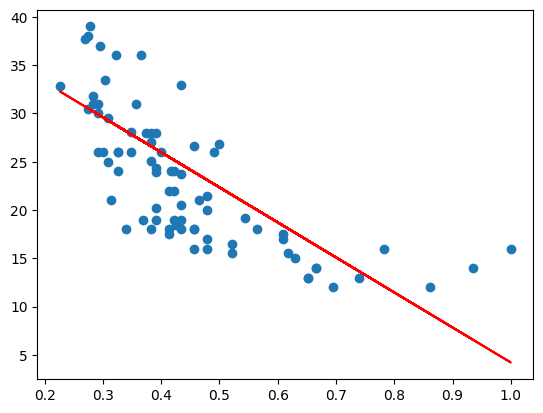

In [ ]:
pred = model.predict(x_test.reshape(-1,1))
plt.scatter(x_test, y_test)
plt.plot(x_test, pred, 'r')
plt.show()


## Segunda parte | Asignación 01

Para la asignación, tendrán que utilizar el algoritmo de regresión lineal para encontrar la relación entre atributos $X$ y la variable objetivo $Y$. A diferencia del ejemplo en la primera parte, $X$ está constituida por dos atributos: *displacement* y *acceleration*. Para completar esta parte tendrá que:

1. Dividir la data en entrenamiento y prueba.
2. Entrenar el modelo lineal.
3. Evaluar el modelo.

Pueden guiarse de la primera parte sin problemas.

In [ ]:
import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = sn.load_dataset('mpg')
data = data.dropna()  # eliminar valores vacios
data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
# Objetivo
y = data['mpg'].values

# Atributo
x = data[['displacement', 'acceleration']].values

In [ ]:
import plotly.express as px

fig = px.scatter_3d(data, x='displacement', y='acceleration', z='mpg')
fig.show()

### 1. Dividir data



In [ ]:
# por favor ingrese su ID para randomizar el orden de los datos [completar]
STUDENT_ID = 1096363

# randomizar el order
data = data.sample(n=len(data), random_state=STUDENT_ID)

# seleccionar el 80% training [completar]
n = len(data)
train_n = int(n * 0.8)
train_data = data[:train_n]

# seleccionar el 20% testing [completar]
test_data = data[train_n:]


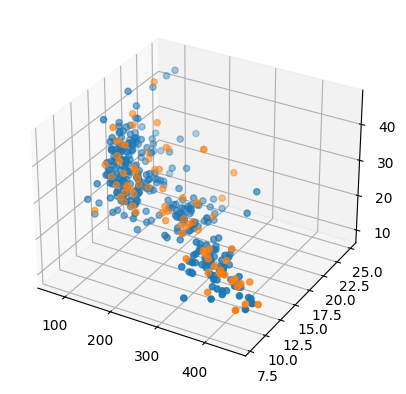

In [ ]:
x_train = train_data[['displacement', 'acceleration']].values
y_train = train_data.mpg.values

x_test = test_data[['displacement', 'acceleration']].values
y_test = test_data.mpg.values

# Visualizando
x_1_train = x_train[:,0]
x_2_train = x_train[:,1]

x_1_test = x_test[:,0]
x_2_test = x_test[:, 1]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_1_train, x_2_train, y_train)
ax.scatter3D(x_1_test, x_2_test, y_test)
plt.show()

### 2. Entrenar el modelo
En esta ocasión tendremos 3 parámetros:

$h = \theta_1 x_1 + \theta_2 x_2 + \theta_0$

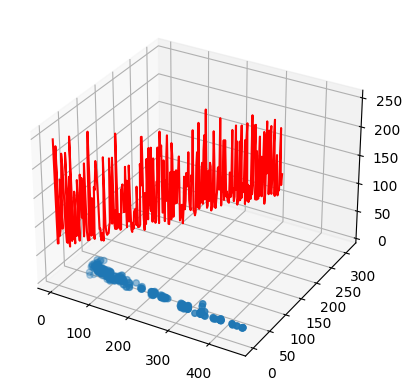

In [ ]:
# Sin entrenar
theta_0 = np.random.random()
theta_1 = np.random.random()
theta_2 = np.random.random()

h = theta_0 + theta_1*x_1_train + theta_2*x_2_train
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_1_train, x_2_train, y_train)
ax.plot3D(range(len(x_1_train)), range(len(x_2_train)), h, 'r')

In [ ]:
# Funcion de error
def mse(y: np.ndarray, pred: np.ndarray):
    return ((y - pred)**2).mean()

In [ ]:
# PROCESO DE ENTRENAMIENTO

x_train = train_data[['displacement', 'acceleration']].values
y_train = train_data.mpg.values
x_1_train = x_train[:,0] / x_train[:,0].max()
x_2_train = x_train[:,1] / x_train[:,1].max()

alpha = 0.00001

theta_0 = np.random.random()
theta_1 = np.random.random()
theta_2 = np.random.random()
for i in range(10000):

    # Calcular los valores de prediction y el error [completar]
    h = theta_0 + theta_1 * x_1_train + theta_2 * x_2_train
    error = mse(y=y_train, pred=h)

    if i % 10 == 0:
        print(f"Error: {error}")

    # Calcular gradientes [completar]
    d_theta_0 = 2 * (h - y_train).sum()
    d_theta_1 = 2 * (h - y_train).dot(x_1_train)
    d_theta_2 = 2 * (h - y_train).dot(x_2_train)


    # Modificando parametros
    theta_0 = theta_0 - alpha*d_theta_0
    theta_1 = theta_1 - alpha*d_theta_1 
    theta_2 = theta_2 - alpha*d_theta_2

Error: 575.6192633935254
Error: 485.0487120888293
Error: 410.664806575662
Error: 349.5653022323781
Error: 299.36838498070307
Error: 258.11934726415524
Error: 224.21399896742773
Error: 196.3358123532205
Error: 173.40433822110327
Error: 154.53287212351626
Error: 138.99371191097808
Error: 126.18964532304418
Error: 115.63055044803679
Error: 106.91419220767256
Error: 99.71046243191842
Error: 93.74844601661628
Error: 88.8058063883682
Error: 84.70007437657752
Error: 81.28149917209505
Error: 78.42718125780321
Error: 76.03625742686572
Error: 74.02594922741012
Error: 72.328320003298
Error: 70.88761346494462
Error: 69.65806950973756
Error: 68.60213171125986
Error: 67.68897624294324
Error: 66.89330459626314
Error: 66.19435278961946
Error: 65.5750782466144
Error: 65.02149248390386
Error: 64.5221134619292
Error: 64.06751614048311
Error: 63.649963628937236
Error: 63.263104478831
Error: 62.90172425811869
Error: 62.561541673243354
Error: 62.23904125068501
Error: 61.931336022108184
Error: 61.63605483283

In [ ]:
print(f"El modelo es h = {theta_1:.2f}x1 + {theta_2:.2f}x2 + {theta_0:.2f}")

El modelo es h = -21.89x1 + 14.14x2 + 23.88


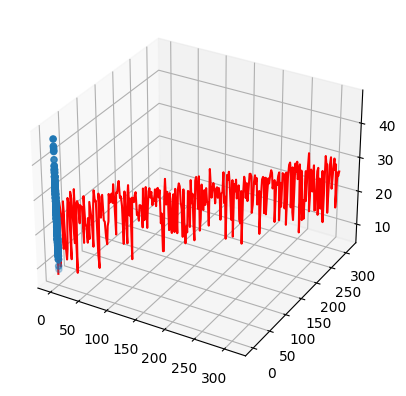

In [ ]:
# Visualizando
h = theta_0 + theta_1*x_1_train + theta_2*x_2_train
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_1_train, x_2_train, y_train)
ax.plot3D(range(len(x_1_train)), range(len(x_2_train)), h, 'r')

### 3. Evaluando el modelo

In [ ]:
x_test = test_data[['displacement', 'acceleration']].values
y_test = test_data.mpg.values
x_1_test = x_test[:,0] / x_test[:,0].max()
x_2_test = x_test[:,1] / x_test[:,1].max()

# Completar codigo
pred_test = theta_0 + theta_1 * x_1_test + theta_2 * x_2_test
mse(y=y_test, pred=pred_test)

27.211691902695154

### Bonus. Intente realizar la práctica utilizando scikit-learn

In [ ]:
# COMPLETAR CODIGO